<a href="https://colab.research.google.com/github/jeev-data-wiz/Sales_analysis/blob/changes/Audio_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np

wav_file = r'/VID_20221020_111210_out.wav'
wav_data, sr = librosa.load(wav_file, sr=8000, mono=True)
print(wav_data.shape)

(130219,)


In [ ]:
#extract F0 using yin
f0 = librosa.yin(wav_data, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'))
print(f0.shape)
print(f0)

(255,)
[  69.31252659  494.69753012  486.8501091   490.08923132 1392.61084094
  250.73725728  251.09441748  116.56179948  215.44446139  168.3719422
 1391.59490756 1284.00481409   69.11139509  300.63821692  386.75456441
  383.35006097  168.91459839 1314.04546527   65.83920392  252.6196063
  507.23446841  501.44538907  503.29599352 1328.92572178  108.17098297
  301.97365898  169.59213915  168.66973854  362.67986721   69.75628324
  351.0186758   350.38929457  360.73461402 1319.51557373   69.1780587
  171.98038819  171.55672019  494.4613931  1302.04898743   80.65771878
  172.0915695   172.38416564  149.45943404  491.86467937   83.15557283
  504.96612659  341.751603   1622.64045869  755.05967897   65.82636531
  149.89819599   95.02101807   74.21667442  149.16312243 1586.88392142
 1615.05163287   65.23668639 1787.22409248   79.29431152  163.55142944
   74.50347324  277.56196108  330.36068521   74.23925796  335.8884227
  340.49033264  339.07798031  339.70293736  341.94808107  345.14074786
  3

In [ ]:
  if hop_length is None:
        hop_length = frame_length // 4

NameError: ignored

In [ ]:
f0 = librosa.yin(wav_data, sr = 8000, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'))
print(f0.shape)

(255,)


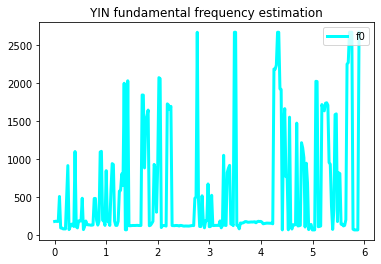

In [ ]:
times = librosa.times_like(f0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set(title='YIN fundamental frequency estimation')
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')
plt.show()

In [ ]:
f0, vid, vpd = librosa.pyin(wav_data, sr = 8000, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'))
print(f0.shape)
print(f0)
print(vid.shape)
print(vpd.shape)

(255,)
[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 119.95585059 119.95585059 122.05264193
 123.47082531 122.75968569 123.47082531 124.18608453 124.9054872
 123.47082531 122.75968569 122.75968569          nan          nan
    

In [ ]:
f0 = np.nan_to_num(f0)

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving marble2.jpg to marble2.jpg


In [1]:

from PIL import Image
import os
import numpy as np
import cv2
import webcolors

def get_background_color(image_path):
    try:
        # Open the image
        img = Image.open(image_path)

        # Convert the image to RGB mode if it's not already in RGB
        img = img.convert("RGB")

        # Get the most frequent color in the image
        background_color = img.getpixel((0, 0))

        return background_color
    except IOError:
        print(f"Error: Unable to open image '{image_path}'.")

def get_pattern_color(image_path, roi):
    try:
        # Open the image
        img = Image.open(image_path)

        # Convert the image to RGB mode if it's not already in RGB
        img = img.convert("RGB")

        # Get the average color within the specified region of interest (ROI)
        cropped_img = img.crop(roi)
        pattern_color = cropped_img.resize((1, 1)).getpixel((0, 0))

        return pattern_color
    except IOError:
        print(f"Error: Unable to open image '{image_path}'.")
    except Exception as e:
        print(f"Error: {e}")

def classify_pattern_thickness(image_path, roi, threshold):
    try:
        # Open the image
        img = Image.open(image_path)

        # Get the width of the pattern within the specified region of interest (ROI)
        pattern_width = roi[2] - roi[0]

        # Classify the pattern as thick or thin based on the width
        pattern_thickness = "thick" if pattern_width >= threshold else "thin"

        return pattern_thickness
    except IOError:
        print(f"Error: Unable to open image '{image_path}'.")
    except Exception as e:
        print(f"Error: {e}")

def detect_roi(image_path):
    try:
        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Perform edge detection using Canny
        edges = cv2.Canny(blurred, 50, 150)

        # Find contours in the edge-detected image
        contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Get the largest contour (assuming it's the marble pattern)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Define the ROI based on the bounding box
        roi = (x, y, x+w, y+h)

        return roi
    except Exception as e:
        print(f"Error: {e}")

def rename_with_colors_and_thickness(image_path, threshold):
    try:
        background_color = get_background_color(image_path)
        roi = detect_roi(image_path)
        pattern_color = get_pattern_color(image_path, roi)
        pattern_thickness = classify_pattern_thickness(image_path, roi, threshold)

        # Convert RGB colors to string representation
        background_color_name = get_color_name(background_color)
        pattern_color_name = get_color_name(pattern_color)

        # Construct new file name with background color, pattern color, and thickness
        new_file_name = f"{background_color_name}_{pattern_color_name}_{pattern_thickness}"

        # Get the file extension
        _, extension = os.path.splitext(image_path)

        # Rename the file
        os.rename(image_path, new_file_name + extension)

        print(f"File '{image_path}' has been renamed to '{new_file_name}{extension}'.")
    except Exception as e:
        print(f"Error: {e}")
def color_distance(color1,color2):
  return sum((c1-c2)**2 for c1,c2 in zip(color1,color2))**0.5

def get_color_name(color):
  try:
    color_name=webcolors.rgb_to_name(color)
  except ValueError:
    closest_color=min(webcolors.CSS3_NAMES_TO_HEX,key=lambda x:color_distance(color,webcolors.hex_to_rgb(webcolors.CSS3_NAMES_TO_HEX[x])))
    color_name=closest_color.replace('-','').title()
  return color_name

# Example usage:
image_path = "/content/test-marble1.jpg"
threshold = 10  # Example threshold value for pattern thickness classification
rename_with_colors_and_thickness(image_path, threshold)

File '/content/test-marble1.jpg' has been renamed to 'Wheat_Antiquewhite_thick.jpg'.


In [2]:
import os
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

def find_matching_files(user_input):
    # Tokenize the user input using spaCy
    doc = nlp(user_input)

    # Extract nouns and adjectives from the user input
    keywords = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ']]

    # Get list of filenames in the current directory
    filenames = os.listdir()

    # Filter filenames based on content matching
    matching_files = []
    for filename in filenames:
        if all(keyword.lower() in filename.lower() for keyword in keywords):
            matching_files.append(filename)

    return matching_files

def main():
    user_input = input("Enter the text: ")
    matching_files = find_matching_files(user_input)

    if matching_files:
        print("Found in the following files:")
        for filename in matching_files:
            print(filename)
    else:
        print("No matching files found.")

if __name__ == "__main__":
    main()


Enter the text: antique white thick
Found in the following files:
Wheat_Antiquewhite_thick.jpg
